In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mortgage_analysis 

# Display DataFrame from CSV

Load CSV into DataFrame

In [43]:
late_30to90_days = mortgage_analysis.load_30to90_csv()
late_90plus_days = mortgage_analysis.load_90plus_csv()
year_month_cols = mortgage_analysis.get_yearmonth_cols(late_30to90_days)
late_30to90_days_region = mortgage_analysis.get_by_region(late_30to90_days, year_month_cols)
late_90plus_days_region = mortgage_analysis.get_by_region(late_90plus_days, year_month_cols)
late_30to90_days_area = mortgage_analysis.get_by_area(late_30to90_days, year_month_cols)
late_90plus_days_area = mortgage_analysis.get_by_area(late_90plus_days, year_month_cols)

Display DataFrame

In [44]:
display(late_30to90_days)
display(late_90plus_days)

,RegionType,Name,CBSACode,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,...,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,National,United States,-----,3.5,3.2,3.1,3.1,3.2,3.2,3.4,...,0.8,0.6,0.7,0.7,0.8,0.8,0.8,0.9,0.8,1.0
1,MetroArea,"Akron, OH",10420,3.4,2.8,2.5,2.9,2.9,3.2,2.9,...,0.8,0.7,0.8,0.6,0.8,0.9,0.8,1.0,1.0,1.3
2,MetroArea,"Albany-Schenectady-Troy, NY",10580,3.0,2.5,2.3,2.5,2.5,2.8,2.7,...,0.8,0.6,0.6,0.6,0.7,0.8,0.7,0.9,0.9,1.1
3,MetroArea,"Albuquerque, NM",10740,3.0,2.8,2.7,2.6,2.6,2.9,3.0,...,0.7,0.6,0.6,0.6,0.9,0.9,1.0,1.1,1.1,1.3
4,MetroArea,"Allentown-Bethlehem-Easton, PA-NJ",10900,3.5,3.1,3.0,2.7,3.0,2.8,3.1,...,1.0,0.7,0.7,0.8,1.0,1.0,1.1,1.0,0.9,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,NonMetroArea,Virginia,51-non,2.7,2.6,2.5,2.5,2.7,2.6,2.7,...,0.7,0.5,0.6,0.6,0.7,0.7,0.7,0.9,0.8,0.8
313,NonMetroArea,Washington,53-non,2.0,1.9,2.0,1.7,1.8,2.0,2.2,...,0.5,0.3,0.5,0.3,0.5,0.4,0.3,0.6,0.5,0.6
314,NonMetroArea,West Virginia,54-non,4.6,4.2,3.5,3.3,3.8,4.1,4.1,...,1.5,1.3,1.5,1.4,1.9,1.7,1.8,1.9,2.1,1.8
315,NonMetroArea,Wisconsin,55-non,2.4,2.0,1.9,2.0,2.1,2.2,2.1,...,0.6,0.4,0.7,0.7,0.8,0.8,0.7,0.9,0.7,0.7


,RegionType,Name,CBSACode,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,...,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,National,United States,-----,1.5,1.6,1.6,1.5,1.6,1.7,1.9,...,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,MetroArea,"Akron, OH",10420,1.8,1.9,1.8,1.6,1.7,1.7,1.7,...,0.7,0.7,0.6,0.7,0.7,0.7,0.7,0.6,0.7,0.6
2,MetroArea,"Albany-Schenectady-Troy, NY",10580,1.0,1.1,1.0,1.0,1.1,1.0,1.2,...,0.8,0.8,0.7,0.7,0.7,0.7,0.7,0.6,0.6,0.6
3,MetroArea,"Albuquerque, NM",10740,1.2,1.1,1.1,1.1,1.3,1.3,1.3,...,0.6,0.5,0.5,0.4,0.5,0.5,0.4,0.4,0.5,0.6
4,MetroArea,"Allentown-Bethlehem-Easton, PA-NJ",10900,1.3,1.2,1.2,1.2,1.3,1.4,1.4,...,0.7,0.7,0.7,0.7,0.8,0.8,0.8,0.7,0.7,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,NonMetroArea,Virginia,51-non,1.3,1.3,1.4,1.4,1.5,1.5,1.6,...,0.4,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.4,0.4
313,NonMetroArea,Washington,53-non,0.6,0.7,0.6,0.6,0.6,0.6,0.7,...,0.3,0.4,0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.2
314,NonMetroArea,West Virginia,54-non,1.1,0.9,0.9,1.0,1.0,0.9,1.2,...,1.1,1.1,1.0,0.9,1.0,1.1,1.2,1.4,1.4,1.5
315,NonMetroArea,Wisconsin,55-non,1.0,1.0,0.9,0.8,0.9,0.8,1.0,...,0.4,0.3,0.3,0.3,0.3,0.3,0.4,0.4,0.4,0.4


## Years and Months List

In [45]:
print(year_month_cols)

['2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07'

# Mortgage Stats

## Data Sample

In [46]:
late_30to90_days.head()

,RegionType,Name,CBSACode,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,...,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,National,United States,-----,3.5,3.2,3.1,3.1,3.2,3.2,3.4,...,0.8,0.6,0.7,0.7,0.8,0.8,0.8,0.9,0.8,1.0
1,MetroArea,"Akron, OH",10420,3.4,2.8,2.5,2.9,2.9,3.2,2.9,...,0.8,0.7,0.8,0.6,0.8,0.9,0.8,1.0,1.0,1.3
2,MetroArea,"Albany-Schenectady-Troy, NY",10580,3.0,2.5,2.3,2.5,2.5,2.8,2.7,...,0.8,0.6,0.6,0.6,0.7,0.8,0.7,0.9,0.9,1.1
3,MetroArea,"Albuquerque, NM",10740,3.0,2.8,2.7,2.6,2.6,2.9,3.0,...,0.7,0.6,0.6,0.6,0.9,0.9,1.0,1.1,1.1,1.3
4,MetroArea,"Allentown-Bethlehem-Easton, PA-NJ",10900,3.5,3.1,3.0,2.7,3.0,2.8,3.1,...,1.0,0.7,0.7,0.8,1.0,1.0,1.1,1.0,0.9,1.1


In [47]:
late_30to90_days.dtypes

RegionType     object
Name           object
CBSACode       object
2008-01       float64
2008-02       float64
               ...   
2021-08       float64
2021-09       float64
2021-10       float64
2021-11       float64
2021-12       float64
Length: 171, dtype: object

## Average percentrage deliquent from 2008-2021

### By Region

In [48]:

display(late_30to90_days_region)
display(late_90plus_days_region)

,0
RegionType,
NonMetroArea,2.65
MetroArea,2.54
National,2.51


,0
RegionType,
National,2.15
MetroArea,1.94
NonMetroArea,1.67


### By Area

In [49]:
display(late_30to90_days_area)
display(late_90plus_days_area)

0
RegionType   Name                              
MetroArea    Laredo, TX                    7.36
             McAllen-Edinburg-Mission, TX  5.31
             Jackson, MS                   4.92
NonMetroArea Mississippi                   4.89
MetroArea    Brownsville-Harlingen, TX     4.80
...                                         ...
             Madison, WI                   1.07
             Fort Collins, CO              1.04
             Santa Cruz-Watsonville, CA    1.03
             Bismarck, ND                  0.96
             Boulder, CO                   0.78

[317 rows x 1 columns]

0
RegionType   Name                                           
MetroArea    Miami-Fort Lauderdale-West Palm Beach, FL  4.94
             East Stroudsburg, PA                       4.72
             Atlantic City-Hammonton, NJ                4.60
             Orlando-Kissimmee-Sanford, FL              4.07
             Las Vegas-Henderson-Paradise, NV           4.05
...                                                      ...
NonMetroArea North Dakota                               0.76
MetroArea    Fargo, ND-MN                               0.70
             Iowa City, IA                              0.68
             Boulder, CO                                0.53
             Bismarck, ND                               0.45

[317 rows x 1 columns]

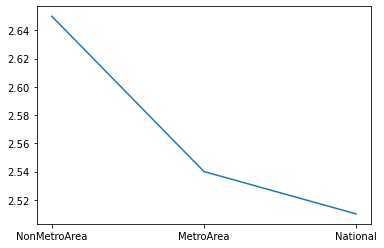

In [50]:
plt.plot(late_30to90_days_region)

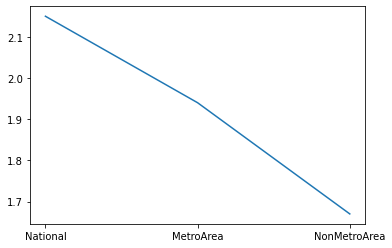

In [51]:
plt.plot(late_90plus_days_region)